# K-means (Iris Dataset)

/opt/anaconda3/envs/tf-metal/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


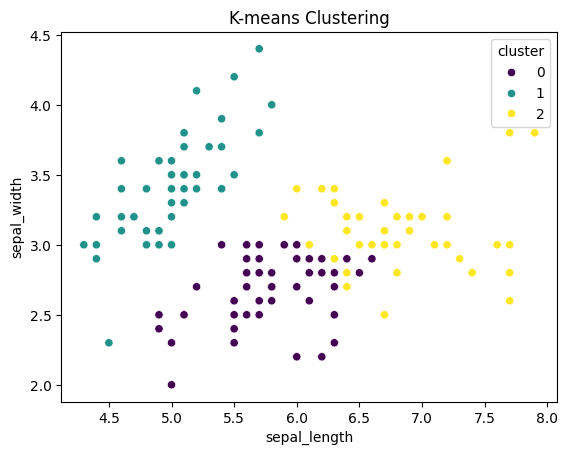

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 로드
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv"
data = pd.read_csv(url)

# 데이터 전처리
X = data.iloc[:, :-1]  # 특성만 선택 (sepal_length, sepal_width, petal_length, petal_width)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# K-means 클러스터링
kmeans = KMeans(n_clusters=3, random_state=42)
data['cluster'] = kmeans.fit_predict(X_scaled)

# 시각화
sns.scatterplot(x='sepal_length', y='sepal_width', hue='cluster', data=data, palette='viridis')
plt.title("K-means Clustering")
plt.show()


# Mean Shift (Make Blobs Dataset)

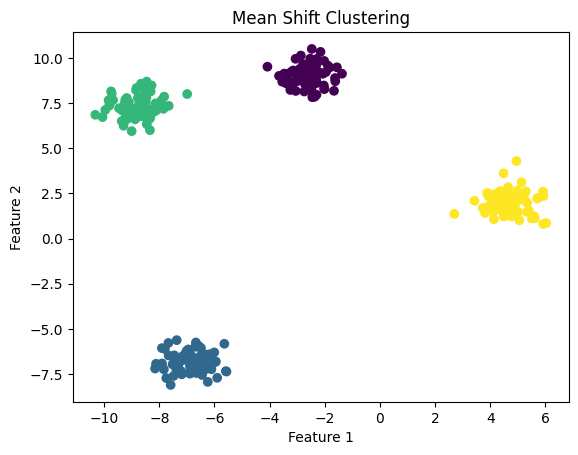

In [2]:
import pandas as pd
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# 데이터 생성
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.6, random_state=42)
data = pd.DataFrame(X, columns=['Feature 1', 'Feature 2'])

# 대역폭 추정
bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=200)

# Mean Shift 클러스터링
meanshift = MeanShift(bandwidth=bandwidth)
data['cluster'] = meanshift.fit_predict(X)

# 시각화
plt.scatter(data['Feature 1'], data['Feature 2'], c=data['cluster'], cmap='viridis')
plt.title("Mean Shift Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


# GMM (Mall Customer Dataset)

In [3]:
import pandas as pd
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 로드
url = "https://raw.githubusercontent.com/selva86/datasets/master/Mall_Customers.csv"
data = pd.read_csv(url)

# 데이터 전처리
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]  # 특성 선택

# GMM 클러스터링
gmm = GaussianMixture(n_components=3, random_state=42)
data['cluster'] = gmm.fit_predict(X)

# 시각화
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='cluster', data=data, palette='viridis')
plt.title("GMM Clustering")
plt.show()


HTTPError: HTTP Error 404: Not Found

# DBSCAN (Geospatial Data)

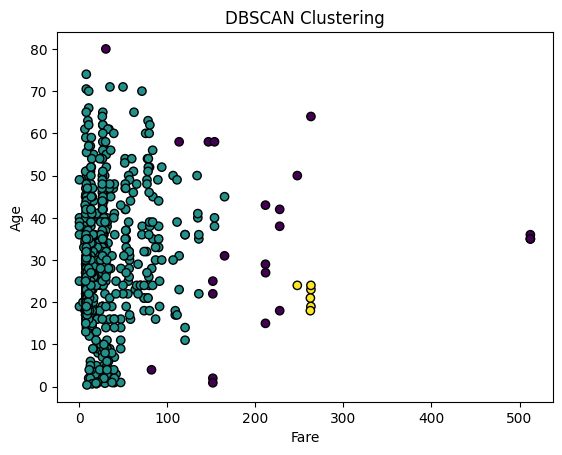

In [4]:
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# 데이터 로드
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
data = pd.read_csv(url)

# 데이터 전처리 (좌표 데이터 예제)
X = data[['Fare', 'Age']].dropna()  # 특성 선택
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# DBSCAN 클러스터링
dbscan = DBSCAN(eps=0.5, min_samples=5)
data = data.loc[X.index]  # 결측값 제거한 인덱스와 맞추기
data['cluster'] = dbscan.fit_predict(X_scaled)

# 시각화
plt.scatter(X['Fare'], X['Age'], c=data['cluster'], cmap='viridis', edgecolor='k')
plt.title("DBSCAN Clustering")
plt.xlabel("Fare")
plt.ylabel("Age")
plt.show()
